In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.7 MB/s 


In [ ]:
import shap
shap.initjs()

In [ ]:
df = pd.read_csv('/content/diabetes_data.csv', sep = ';')

In [ ]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
df.shape

(520, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [ ]:
df.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.corr()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age,1.000000,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
polyuria,0.199781,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden_weight_loss,0.064808,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital_thrush,0.096519,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual_blurring,0.402729,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384
irritability,0.201625,0.237740,0.203446,0.140340,0.146698,0.239466,0.160551,0.077095,0.114006,1.000000,0.126877,0.151571,0.201637,0.043708,0.127801,0.299467


Encoding

In [ ]:
dummies = pd.get_dummies(df['gender'], drop_first = True)

In [ ]:
df = df.drop('gender', axis = 1)

In [ ]:
df = pd.concat([df, dummies], axis = 1)
df = df.rename(columns = {'Male' : 'gender'})
df.head()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,gender
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

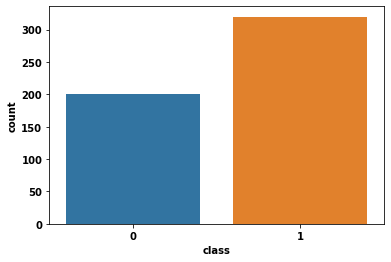

In [ ]:
sb.countplot(x = 'class', data = df)
plt.xlabel('class', fontweight = 'bold')
plt.ylabel('count', fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

Missing value check

Text(0.5, 1.0, 'Null Values in Data Frame')

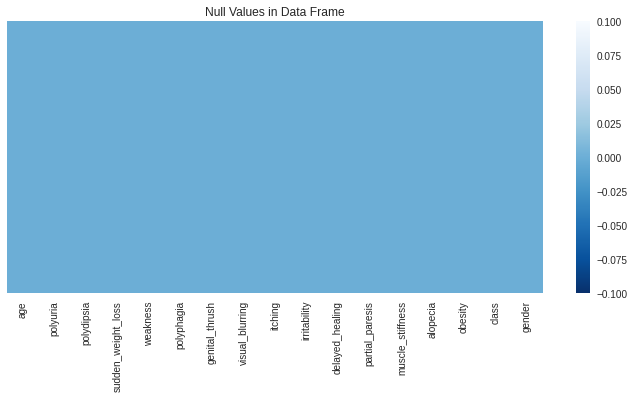

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(12,5))
sb.heatmap(df.isnull(), yticklabels = False, cmap = 'Blues_r')
plt.title('Null Values in Data Frame')

Check Traget value

**EDA**

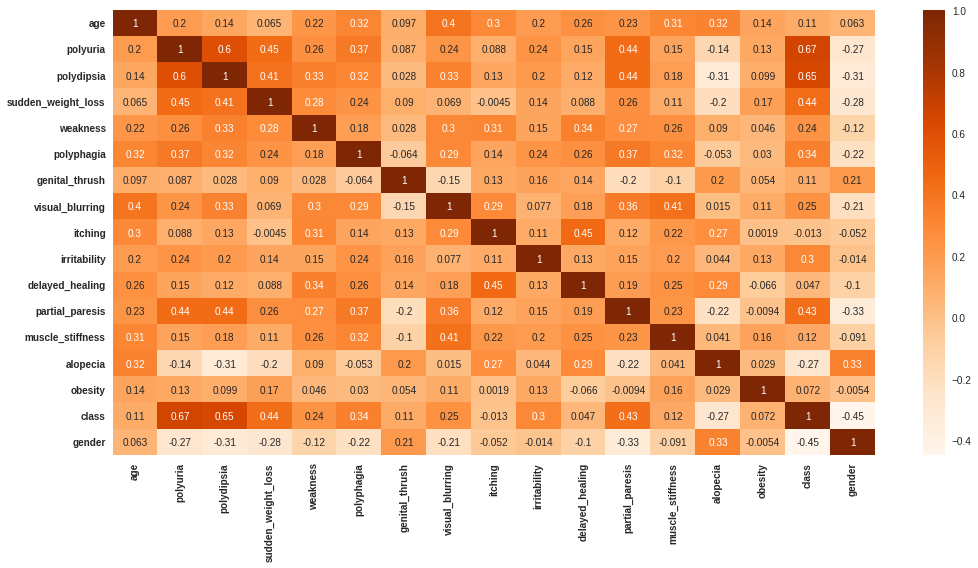

In [ ]:
plt.figure(figsize=(15,8))
ax = sb.heatmap(data = df.corr(), cmap ='Oranges', annot = True)
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

plt.tight_layout()

#plt.savefig('Heatmap.png', dpi=800)
#plt.savefig('Heatmap.pdf', dpi=800)

Blanced imblanced dataset using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ['class']]
# Store the variable we are predicting
target = "class"
X = df[columns]
Y = df[target]

In [ ]:
sm = SMOTE(random_state = 42)

In [ ]:
x_res, y_res = sm.fit_resample(X, Y)

In [ ]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 320, 0: 200})
Resampled dataset shape Counter({1: 320, 0: 320})


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

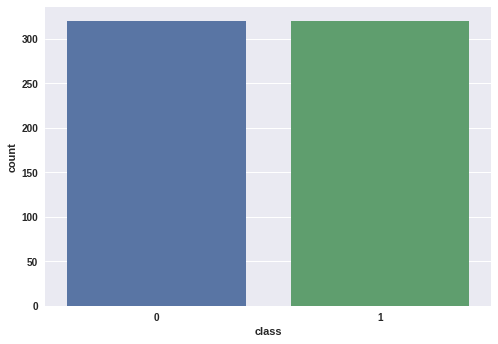

In [ ]:
sb.countplot(y_res)
plt.xlabel('class', fontweight = 'bold')
plt.ylabel('count', fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

Plot for Traget class

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


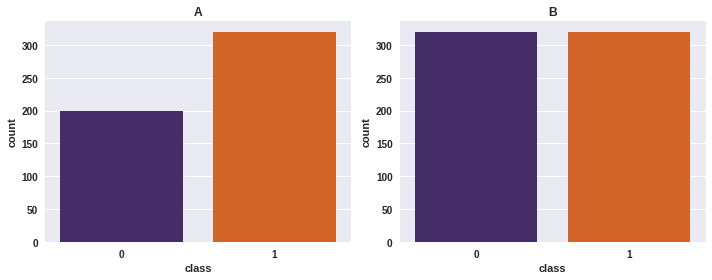

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.title('A', weight='bold')
sb.countplot(x = 'class', data = df, palette=['#432371',"#EF5B0C"])
plt.xlabel('class', fontweight = 'bold')
plt.ylabel('count', fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')


plt.subplot(1, 2, 2)
plt.title('B', weight='bold')
sb.countplot(y_res, palette=['#432371',"#EF5B0C"])
plt.xlabel('class', fontweight = 'bold')
plt.ylabel('count', fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

plt.tight_layout()

#plt.savefig('Target Class.png', dpi=800)
#plt.savefig('Target Class.pdf', dpi=800)

# **Model Bulid For Unbalanced Data Set**

**Use Train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
dt = tree.DecisionTreeClassifier()

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_ub_pred = dt.predict(x_test)

In [ ]:
accuracy_score(y_test, dt_ub_pred), precision_score(y_test, dt_ub_pred), recall_score(y_test, dt_ub_pred), f1_score(y_test, dt_ub_pred)

(0.9551282051282052,
 0.9797979797979798,
 0.9509803921568627,
 0.9651741293532337)

In [ ]:
cm = confusion_matrix(y_test, dt_ub_pred)
#sb.heatmap(cm, annot = True, fmt ='d')

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9629629629629629


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9509803921568627


In [ ]:
cohen_kappa_score(y_test, dt_ub_pred)

0.9021505376344086

In [ ]:
matthews_corrcoef(y_test, dt_ub_pred)

0.9029448395382963

In [ ]:
#explainer = shap.Explainer(dt.predict, x_test)
#dt_shap_values = explainer(x_test)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier(n_estimators = 130)

In [ ]:
Rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=130)

In [ ]:
rfc_ub_pred = Rfc.predict(x_test)

In [ ]:
accuracy_score(y_test, rfc_ub_pred), precision_score(y_test, rfc_ub_pred), recall_score(y_test, rfc_ub_pred), f1_score(y_test, rfc_ub_pred)

(0.9935897435897436, 1.0, 0.9901960784313726, 0.9950738916256158)

In [ ]:
cm = confusion_matrix(y_test, rfc_ub_pred)
#sb.heatmap(cm, annot = True, fmt ='d')

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  1.0


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9901960784313726


In [ ]:
cohen_kappa_score(y_test, rfc_ub_pred)

0.9859002169197397

In [ ]:
matthews_corrcoef(y_test, rfc_ub_pred)

0.9859982319299483

In [ ]:
#explainer = shap.Explainer(Rfc.predict, x_test)
#rfc_shap_values = explainer(x_test)

SVM

In [ ]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear', probability = True)

In [ ]:
svm_linear.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
svm_ub_pred = svm_linear.predict(x_test)

In [ ]:
accuracy_score(y_test, svm_ub_pred), precision_score(y_test, svm_ub_pred), recall_score(y_test, svm_ub_pred), f1_score(y_test, svm_ub_pred)

(0.9358974358974359,
 0.9509803921568627,
 0.9509803921568627,
 0.9509803921568627)

In [ ]:
cm = confusion_matrix(y_test, svm_ub_pred)
#sb.heatmap(cm, annot = True, fmt ='d')

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9074074074074074


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9509803921568627


In [ ]:
cohen_kappa_score(y_test, svm_ub_pred)

0.8583877995642701

In [ ]:
matthews_corrcoef(y_test, svm_ub_pred)

0.8583877995642701

In [ ]:
#explainer = shap.Explainer(svm_linear.predict, x_test)
#svm_shap_values = explainer(x_test)

XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
xgb.fit(x_train, y_train)

XGBClassifier()

In [ ]:
xgb_ub_pred = xgb.predict(x_test)

In [ ]:
accuracy_score(y_test, xgb_ub_pred), precision_score(y_test, xgb_ub_pred), recall_score(y_test, xgb_ub_pred), f1_score(y_test, xgb_ub_pred)

(0.9871794871794872, 1.0, 0.9803921568627451, 0.99009900990099)

In [ ]:
cm = confusion_matrix(y_test, xgb_ub_pred)
#sb.heatmap(cm, annot = True, fmt ='d')

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  1.0


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9803921568627451


In [ ]:
cohen_kappa_score(y_test, xgb_ub_pred)

0.9719222462203023

In [ ]:
matthews_corrcoef(y_test, xgb_ub_pred)

0.9723055853282465

In [ ]:
#explainer = shap.Explainer(xgb.predict, x_test)
#xgb_shap_values = explainer(x_test)

LightGBM

In [ ]:
import lightgbm as lgb
model =lgb.LGBMClassifier()

In [ ]:
model.fit(x_train, y_train)

LGBMClassifier()

In [ ]:
lgb_ub_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test, lgb_ub_pred), precision_score(y_test, lgb_ub_pred), recall_score(y_test, lgb_ub_pred), f1_score(y_test, lgb_ub_pred)

(0.9807692307692307, 1.0, 0.9705882352941176, 0.9850746268656716)

In [ ]:
cm = confusion_matrix(y_test, lgb_ub_pred)
#sb.heatmap(cm, annot = True, fmt ='d')

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  1.0


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9705882352941176


In [ ]:
cohen_kappa_score(y_test, lgb_ub_pred)

0.9580645161290322

In [ ]:
matthews_corrcoef(y_test, lgb_ub_pred)

0.9589080477099189

In [ ]:
#explainer = shap.Explainer(model.predict, x_test)
#lgb_shap_values = explainer(x_test)

Multi-Layer Perceptron(MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(5,5),random_state=42,verbose=True,learning_rate_init=0.01)

In [ ]:
clf.fit(x_train, y_train)

Iteration 1, loss = 0.75181372
Iteration 2, loss = 0.71543275
Iteration 3, loss = 0.68157594
Iteration 4, loss = 0.65716830
Iteration 5, loss = 0.67593128
Iteration 6, loss = 0.65059167
Iteration 7, loss = 0.62814648
Iteration 8, loss = 0.63438409
Iteration 9, loss = 0.62225503
Iteration 10, loss = 0.60303240
Iteration 11, loss = 0.59872973
Iteration 12, loss = 0.58719424
Iteration 13, loss = 0.57387986
Iteration 14, loss = 0.56590395
Iteration 15, loss = 0.55415464
Iteration 16, loss = 0.53948291
Iteration 17, loss = 0.52865560
Iteration 18, loss = 0.51433240
Iteration 19, loss = 0.50373726
Iteration 20, loss = 0.48756641
Iteration 21, loss = 0.47176308
Iteration 22, loss = 0.45872095
Iteration 23, loss = 0.44463819
Iteration 24, loss = 0.43066078
Iteration 25, loss = 0.41673487
Iteration 26, loss = 0.40063108
Iteration 27, loss = 0.38667678
Iteration 28, loss = 0.37712316
Iteration 29, loss = 0.36038413
Iteration 30, loss = 0.35110490
Iteration 31, loss = 0.33894730
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(5, 5), learning_rate_init=0.01,
              random_state=42, verbose=True)

In [ ]:
mlp_ub_pred = clf.predict(x_test)

In [ ]:
accuracy_score(y_test, mlp_ub_pred), precision_score(y_test, mlp_ub_pred), recall_score(y_test, mlp_ub_pred), f1_score(y_test, mlp_ub_pred)

(0.9358974358974359,
 0.9423076923076923,
 0.9607843137254902,
 0.9514563106796117)

In [ ]:
cm = confusion_matrix(y_test, mlp_ub_pred)
#sb.heatmap(cm, annot = True, fmt ='d')

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.8888888888888888


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9607843137254902


In [ ]:
cohen_kappa_score(y_test, mlp_ub_pred)

0.8571428571428572

In [ ]:
matthews_corrcoef(y_test, mlp_ub_pred)

0.8574929257125442

In [ ]:
#explainer = shap.Explainer(clf.predict, x_test)
#mlp_shap_values = explainer(x_test)

SHAP Summary plot

In [ ]:
"""plt.title('A', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
shap.summary_plot(dt_shap_values, show = False)

plt.tight_layout()
plt.savefig('DT-IB SHAP(A).png', dpi=800)
plt.savefig('DT-IB SHAP(A).pdf', dpi=800)"""

"plt.title('A', weight='bold')\nplt.xticks(weight='bold')\nplt.yticks(weight='bold')\nshap.summary_plot(dt_shap_values, show = False)\n\nplt.tight_layout()\nplt.savefig('DT-IB SHAP(A).png', dpi=800)\nplt.savefig('DT-IB SHAP(A).pdf', dpi=800)"

In [ ]:
"""plt.title('B', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
shap.summary_plot(rfc_shap_values, show = False)

plt.tight_layout()
plt.savefig('RF-IB SHAP(B).png', dpi=800)
plt.savefig('RF-IB SHAP(B).pdf', dpi=800)"""

"plt.title('B', weight='bold')\nplt.xticks(weight='bold')\nplt.yticks(weight='bold')\nshap.summary_plot(rfc_shap_values, show = False)\n\nplt.tight_layout()\nplt.savefig('RF-IB SHAP(B).png', dpi=800)\nplt.savefig('RF-IB SHAP(B).pdf', dpi=800)"

In [ ]:
"""plt.title('C', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
shap.summary_plot(svm_shap_values, show = False)

plt.tight_layout()

plt.savefig('SVM-IB SHAP(C).png', dpi=800)
plt.savefig('SVM-IB SHAP(C).pdf', dpi=800)"""

"plt.title('C', weight='bold')\nplt.xticks(weight='bold')\nplt.yticks(weight='bold')\nshap.summary_plot(svm_shap_values, show = False)\n\nplt.tight_layout()\n\nplt.savefig('SVM-IB SHAP(C).png', dpi=800)\nplt.savefig('SVM-IB SHAP(C).pdf', dpi=800)"

In [ ]:
"""plt.title('D', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
shap.summary_plot(xgb_shap_values, show = False)

plt.tight_layout()

plt.savefig('XGB-IB SHAP(D).png', dpi=800)
plt.savefig('XGB-IB SHAP(D).pdf', dpi=800)"""

"plt.title('D', weight='bold')\nplt.xticks(weight='bold')\nplt.yticks(weight='bold')\nshap.summary_plot(xgb_shap_values, show = False)\n\nplt.tight_layout()\n\nplt.savefig('XGB-IB SHAP(D).png', dpi=800)\nplt.savefig('XGB-IB SHAP(D).pdf', dpi=800)"

In [ ]:
"""plt.title('E', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
shap.summary_plot(lgb_shap_values, show = False)

plt.tight_layout()
plt.savefig('LGB-IB SHAP(E).png', dpi=800)
plt.savefig('LGB-IB SHAP(E).pdf', dpi=800)"""

"plt.title('E', weight='bold')\nplt.xticks(weight='bold')\nplt.yticks(weight='bold')\nshap.summary_plot(lgb_shap_values, show = False)\n\nplt.tight_layout()\nplt.savefig('LGB-IB SHAP(E).png', dpi=800)\nplt.savefig('LGB-IB SHAP(E).pdf', dpi=800)"

In [ ]:
"""plt.title('F', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
shap.summary_plot(mlp_shap_values, show = False)

plt.tight_layout()
plt.savefig('MLP-IB SHAP(F).png', dpi=800)
plt.savefig('MLP-IB SHAP(F).pdf', dpi=800)"""

"plt.title('F', weight='bold')\nplt.xticks(weight='bold')\nplt.yticks(weight='bold')\nshap.summary_plot(mlp_shap_values, show = False)\n\nplt.tight_layout()\nplt.savefig('MLP-IB SHAP(F).png', dpi=800)\nplt.savefig('MLP-IB SHAP(F).pdf', dpi=800)"

**Use K-Flod Cross Valadition**

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_val_predict
kf=KFold(n_splits = 5, random_state = 1, shuffle= True)

Decision Tree

In [ ]:
pred = cross_val_predict(dt, x_test, y_test, cv=kf)
cm = confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred)

(0.9102564102564102, 0.9489795918367347, 0.9117647058823529)

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9074074074074074


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9117647058823529


In [ ]:
f1_score(y_test, pred), cohen_kappa_score(y_test, pred), matthews_corrcoef(y_test, pred)

(0.9300000000000002, 0.8051391862955032, 0.8063899203131092)

RF

In [ ]:
pred = cross_val_predict(Rfc, x_test, y_test, cv=kf)
cm = confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred)

(0.9423076923076923, 0.9514563106796117, 0.9607843137254902)

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9074074074074074


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9607843137254902


In [ ]:
f1_score(y_test, pred), cohen_kappa_score(y_test, pred), matthews_corrcoef(y_test, pred)

(0.9560975609756097, 0.8719912472647702, 0.8720794622452479)

SVM

In [ ]:
pred = cross_val_predict(svm_linear, x_test, y_test, cv=kf)
cm = confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred)

(0.8974358974358975, 0.8981481481481481, 0.9509803921568627)

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.7962962962962963


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9509803921568627


In [ ]:
f1_score(y_test, pred), cohen_kappa_score(y_test, pred), matthews_corrcoef(y_test, pred)

(0.9238095238095237, 0.767337807606264, 0.770275179513539)

XGBoost

In [ ]:
pred = cross_val_predict(xgb, x_test, y_test, cv=kf)
cm = confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred)

(0.9294871794871795, 0.9690721649484536, 0.9215686274509803)

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9444444444444444


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9215686274509803


In [ ]:
f1_score(y_test, pred), cohen_kappa_score(y_test, pred), matthews_corrcoef(y_test, pred)

(0.9447236180904522, 0.847547974413646, 0.8495902901878082)

LightGBM

In [ ]:
pred = cross_val_predict(model, x_test, y_test, cv=kf)
cm = confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred)

(0.9294871794871795, 0.9690721649484536, 0.9215686274509803)

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9444444444444444


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9215686274509803


In [ ]:
f1_score(y_test, pred), cohen_kappa_score(y_test, pred), matthews_corrcoef(y_test, pred)

(0.9447236180904522, 0.847547974413646, 0.8495902901878082)

MLP

In [ ]:
pred = cross_val_predict(clf, x_test, y_test, cv=kf)
cm = confusion_matrix(y_test, pred)

Iteration 1, loss = 0.73735155
Iteration 2, loss = 0.63813917
Iteration 3, loss = 0.67998118
Iteration 4, loss = 0.67537228
Iteration 5, loss = 0.63834086
Iteration 6, loss = 0.62306035
Iteration 7, loss = 0.63216866
Iteration 8, loss = 0.64018816
Iteration 9, loss = 0.63369082
Iteration 10, loss = 0.61776392
Iteration 11, loss = 0.60413947
Iteration 12, loss = 0.60036861
Iteration 13, loss = 0.60325920
Iteration 14, loss = 0.60289899
Iteration 15, loss = 0.59478644
Iteration 16, loss = 0.58344634
Iteration 17, loss = 0.57546075
Iteration 18, loss = 0.57260553
Iteration 19, loss = 0.57132248
Iteration 20, loss = 0.56726192
Iteration 21, loss = 0.55934747
Iteration 22, loss = 0.55004126
Iteration 23, loss = 0.54265248
Iteration 24, loss = 0.53808530
Iteration 25, loss = 0.53391760
Iteration 26, loss = 0.52726199
Iteration 27, loss = 0.51840457
Iteration 28, loss = 0.50987599
Iteration 29, loss = 0.50322630
Iteration 30, loss = 0.49750505
Iteration 31, loss = 0.49051809
Iteration 32, los

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Iteration 47, loss = 0.36797429
Iteration 48, loss = 0.36093867
Iteration 49, loss = 0.35352936
Iteration 50, loss = 0.34633953
Iteration 51, loss = 0.33981035
Iteration 52, loss = 0.33333526
Iteration 53, loss = 0.32670293
Iteration 54, loss = 0.32053257
Iteration 55, loss = 0.31479366
Iteration 56, loss = 0.30897028
Iteration 57, loss = 0.30331269
Iteration 58, loss = 0.29816188
Iteration 59, loss = 0.29311350
Iteration 60, loss = 0.28807334
Iteration 61, loss = 0.28344495
Iteration 62, loss = 0.27902892
Iteration 63, loss = 0.27460229
Iteration 64, loss = 0.27046512
Iteration 65, loss = 0.26658812
Iteration 66, loss = 0.26271286
Iteration 67, loss = 0.25903752
Iteration 68, loss = 0.25558386
Iteration 69, loss = 0.25214484
Iteration 70, loss = 0.24886800
Iteration 71, loss = 0.24576680
Iteration 72, loss = 0.24268033
Iteration 73, loss = 0.23974263
Iteration 74, loss = 0.23693741
Iteration 75, loss = 0.23415710
Iteration 76, loss = 0.23151518
Iteration 77, loss = 0.22895514
Iteratio

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Iteration 110, loss = 0.12419197
Iteration 111, loss = 0.12236115
Iteration 112, loss = 0.11939900
Iteration 113, loss = 0.11802161
Iteration 114, loss = 0.11500152
Iteration 115, loss = 0.11322698
Iteration 116, loss = 0.11042033
Iteration 117, loss = 0.10854672
Iteration 118, loss = 0.10670355
Iteration 119, loss = 0.10385368
Iteration 120, loss = 0.10261309
Iteration 121, loss = 0.10018797
Iteration 122, loss = 0.09861623
Iteration 123, loss = 0.09563194
Iteration 124, loss = 0.09276935
Iteration 125, loss = 0.09449392
Iteration 126, loss = 0.09340445
Iteration 127, loss = 0.08723215
Iteration 128, loss = 0.08712077
Iteration 129, loss = 0.08416486
Iteration 130, loss = 0.08065468
Iteration 131, loss = 0.08013524
Iteration 132, loss = 0.07669119
Iteration 133, loss = 0.07589361
Iteration 134, loss = 0.07247383
Iteration 135, loss = 0.06957224
Iteration 136, loss = 0.06931418
Iteration 137, loss = 0.06511977
Iteration 138, loss = 0.06421710
Iteration 139, loss = 0.06098361
Iteration 

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Iteration 104, loss = 0.12287746
Iteration 105, loss = 0.12021487
Iteration 106, loss = 0.11766458
Iteration 107, loss = 0.11591082
Iteration 108, loss = 0.11313963
Iteration 109, loss = 0.10890398
Iteration 110, loss = 0.10614971
Iteration 111, loss = 0.10419187
Iteration 112, loss = 0.10148505
Iteration 113, loss = 0.09809053
Iteration 114, loss = 0.09569603
Iteration 115, loss = 0.09275846
Iteration 116, loss = 0.09010070
Iteration 117, loss = 0.08803602
Iteration 118, loss = 0.08551119
Iteration 119, loss = 0.08300108
Iteration 120, loss = 0.08108552
Iteration 121, loss = 0.07855877
Iteration 122, loss = 0.07688210
Iteration 123, loss = 0.07559904
Iteration 124, loss = 0.07478284
Iteration 125, loss = 0.07265917
Iteration 126, loss = 0.06903885
Iteration 127, loss = 0.06706009
Iteration 128, loss = 0.06724404
Iteration 129, loss = 0.06533783
Iteration 130, loss = 0.06151056
Iteration 131, loss = 0.06139488
Iteration 132, loss = 0.06013035
Iteration 133, loss = 0.05727329
Iteration 

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Iteration 52, loss = 0.30052237
Iteration 53, loss = 0.29426443
Iteration 54, loss = 0.28682135
Iteration 55, loss = 0.28063300
Iteration 56, loss = 0.27432763
Iteration 57, loss = 0.26823507
Iteration 58, loss = 0.26247154
Iteration 59, loss = 0.25632488
Iteration 60, loss = 0.25000112
Iteration 61, loss = 0.24443766
Iteration 62, loss = 0.23842800
Iteration 63, loss = 0.23314927
Iteration 64, loss = 0.22745999
Iteration 65, loss = 0.22219955
Iteration 66, loss = 0.21679940
Iteration 67, loss = 0.21161633
Iteration 68, loss = 0.20644248
Iteration 69, loss = 0.20139170
Iteration 70, loss = 0.19642002
Iteration 71, loss = 0.19159417
Iteration 72, loss = 0.18681983
Iteration 73, loss = 0.18228428
Iteration 74, loss = 0.17773131
Iteration 75, loss = 0.17352359
Iteration 76, loss = 0.16925174
Iteration 77, loss = 0.16534041
Iteration 78, loss = 0.16146539
Iteration 79, loss = 0.15778403
Iteration 80, loss = 0.15433657
Iteration 81, loss = 0.15091322
Iteration 82, loss = 0.14774999
Iteratio

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [ ]:
accuracy_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred)

(0.9294871794871795, 0.9504950495049505, 0.9411764705882353)

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9074074074074074


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9411764705882353


In [ ]:
f1_score(y_test, pred), cohen_kappa_score(y_test, pred), matthews_corrcoef(y_test, pred)

(0.9458128078817734, 0.8449023861171366, 0.8449863835791306)

# **Model Built for Blanced dataset**

**Using train_test_split**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_res, y_res, test_size= 0.3, random_state = 42)

DT

In [ ]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt.predict(xtest)

In [ ]:
accuracy_score(ytest, dt_pred), precision_score(ytest, dt_pred), recall_score(ytest, dt_pred), f1_score(ytest, dt_pred)

(0.9583333333333334, 0.989247311827957, 0.9292929292929293, 0.9583333333333333)

In [ ]:
cm = confusion_matrix(ytest, dt_pred)
#sb.heatmap(cm, annot = True, fmt ='d')

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.989247311827957


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9292929292929293


In [ ]:
cohen_kappa_score(ytest, dt_pred)

0.9167479674796748

In [ ]:
matthews_corrcoef(ytest, dt_pred)

0.9185402411208863

In [ ]:
explainer = shap.Explainer(dt.predict, xtest)
dt_shap_values = explainer(xtest)

Permutation explainer: 193it [00:25,  5.81it/s]


RF

In [ ]:
Rfc.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=130)

In [ ]:
rfc_pred = Rfc.predict(xtest)

In [ ]:
accuracy_score(ytest, rfc_pred), precision_score(ytest, rfc_pred), recall_score(ytest, rfc_pred), f1_score(ytest, rfc_pred)

(0.984375, 0.98, 0.98989898989899, 0.9849246231155778)

In [ ]:
cm = confusion_matrix(ytest, rfc_pred)
#sb.heatmap(cm, annot = True, fmt ='d')

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.978494623655914


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.98989898989899


In [ ]:
cohen_kappa_score(ytest, rfc_pred)

0.9687092568448501

In [ ]:
matthews_corrcoef(ytest, rfc_pred)

0.9687619541172979

In [ ]:
explainer = shap.Explainer(Rfc.predict, xtest)
rfc_shap_values = explainer(xtest)

Permutation explainer: 193it [01:58,  1.52it/s]


SVM

In [ ]:
svm_linear.fit(xtrain, ytrain)

SVC(kernel='linear', probability=True)

In [ ]:
svm_pred = svm_linear.predict(xtest)

In [ ]:
accuracy_score(ytest, svm_pred), precision_score(ytest, svm_pred), recall_score(ytest, svm_pred), f1_score(ytest, svm_pred)

(0.921875, 0.9117647058823529, 0.9393939393939394, 0.9253731343283583)

In [ ]:
cm = confusion_matrix(ytest, svm_pred)
#sb.heatmap(cm, annot = True, fmt ='d')

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9032258064516129


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9393939393939394


In [ ]:
cohen_kappa_score(ytest, svm_pred)

0.8434442270058709

In [ ]:
matthews_corrcoef(ytest, svm_pred)

0.8438579827308006

In [ ]:
explainer = shap.Explainer(svm_linear.predict, xtest)
svm_shap_values = explainer(xtest)

Permutation explainer: 193it [00:20,  4.72it/s]


XGBoost

In [ ]:
xgb.fit(xtrain, ytrain)

XGBClassifier()

In [ ]:
xgb_pred = xgb.predict(xtest)

In [ ]:
accuracy_score(ytest, xgb_pred), precision_score(ytest, xgb_pred), recall_score(ytest, xgb_pred), f1_score(ytest, xgb_pred)

(0.9635416666666666,
 0.9791666666666666,
 0.9494949494949495,
 0.9641025641025641)

In [ ]:
cm = confusion_matrix(ytest, xgb_pred)
#sb.heatmap(cm, annot = True, fmt ='d')

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.978494623655914


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9494949494949495


In [ ]:
cohen_kappa_score(ytest, xgb_pred)

0.9270833333333334

In [ ]:
matthews_corrcoef(ytest, xgb_pred)

0.9275363425630716

In [ ]:
explainer = shap.Explainer(xgb.predict, xtest)
xgb_shap_values = explainer(xtest)

Permutation explainer: 193it [00:21,  4.73it/s]


LightGBM

In [ ]:
model.fit(xtrain, ytrain)

LGBMClassifier()

In [ ]:
lgb_pred = model.predict(xtest)

In [ ]:
accuracy_score(ytest, lgb_pred), precision_score(ytest, lgb_pred), recall_score(ytest, lgb_pred), f1_score(ytest, lgb_pred)

(0.9427083333333334,
 0.9782608695652174,
 0.9090909090909091,
 0.9424083769633508)

In [ ]:
cm = confusion_matrix(ytest, lgb_pred)
#sb.heatmap(cm, annot = True, fmt ='d')

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.978494623655914


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9090909090909091


In [ ]:
cohen_kappa_score(ytest, lgb_pred)

0.8855656697009102

In [ ]:
matthews_corrcoef(ytest, lgb_pred)

0.8879231369500402

In [ ]:
explainer = shap.Explainer(model.predict, xtest)
lgb_shap_values = explainer(xtest)

Permutation explainer: 193it [00:33,  4.09it/s]


MLP

In [ ]:
clf.fit(xtrain, ytrain)

Iteration 1, loss = 0.82034071
Iteration 2, loss = 0.83234407
Iteration 3, loss = 0.71014699
Iteration 4, loss = 0.69933855
Iteration 5, loss = 0.70540001
Iteration 6, loss = 0.64398632
Iteration 7, loss = 0.65140200
Iteration 8, loss = 0.62786355
Iteration 9, loss = 0.61276443
Iteration 10, loss = 0.60115702
Iteration 11, loss = 0.57968038
Iteration 12, loss = 0.56796509
Iteration 13, loss = 0.54452096
Iteration 14, loss = 0.52805276
Iteration 15, loss = 0.50970228
Iteration 16, loss = 0.48011073
Iteration 17, loss = 0.45315371
Iteration 18, loss = 0.42489742
Iteration 19, loss = 0.39824959
Iteration 20, loss = 0.37250015
Iteration 21, loss = 0.34878563
Iteration 22, loss = 0.33230768
Iteration 23, loss = 0.31345813
Iteration 24, loss = 0.30208233
Iteration 25, loss = 0.28394370
Iteration 26, loss = 0.27585476
Iteration 27, loss = 0.27734509
Iteration 28, loss = 0.25145841
Iteration 29, loss = 0.25010887
Iteration 30, loss = 0.23448953
Iteration 31, loss = 0.22842278
Iteration 32, los

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLPClassifier(hidden_layer_sizes=(5, 5), learning_rate_init=0.01,
              random_state=42, verbose=True)

In [ ]:
mlp_pred = clf.predict(xtest)

In [ ]:
accuracy_score(ytest, mlp_pred), precision_score(ytest, mlp_pred), recall_score(ytest, mlp_pred), f1_score(ytest, mlp_pred)

(0.9322916666666666, 0.9387755102040817, 0.9292929292929293, 0.934010152284264)

In [ ]:
cm = confusion_matrix(ytest, mlp_pred)
#sb.heatmap(cm, annot = True, fmt ='d')

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9354838709677419


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9292929292929293


In [ ]:
cohen_kappa_score(ytest, mlp_pred)

0.8644951140065147

In [ ]:
matthews_corrcoef(ytest, mlp_pred)

0.8645420808251775

In [ ]:
explainer = shap.Explainer(clf.predict, xtest)
mlp_shap_values = explainer(xtest)

# **ROC curve & Precision-Recall curve for Imblanced & Blanced Dataset**

In [ ]:
import sklearn.metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, roc_curve, average_precision_score, roc_auc_score

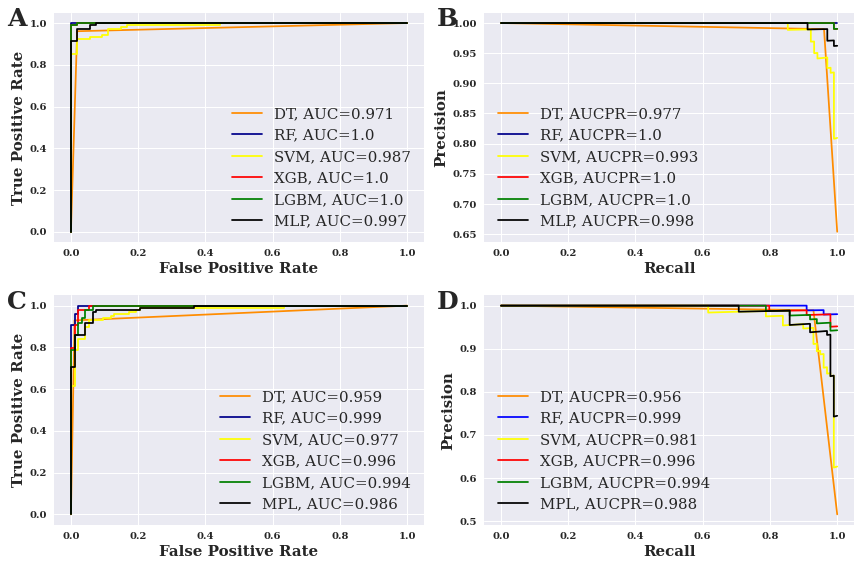

In [ ]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.family':'serif'})

plt.subplot(2, 2, 1)
plt.title('A', weight='bold', fontsize=25, y = 0.915, x=-0.1)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
y_pred = dt.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 3)
plt.plot(fpr,tpr, color="darkorange", label="DT, AUC="+str(auc))

y_pred = Rfc.predict_proba(x_test)[:, 1]
fpr, tpr, _ =roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 3)
plt.plot(fpr,tpr, color="darkblue", label="RF, AUC="+str(auc))

y_pred = svm_linear.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 3)
plt.plot(fpr,tpr, color="yellow", label="SVM, AUC="+str(auc))

y_pred = xgb.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 3)
plt.plot(fpr,tpr, color="red", label="XGB, AUC="+str(auc))

y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 3)
plt.plot(fpr,tpr, color="Green", label="LGBM, AUC="+str(auc))

y_pred = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 3)
plt.plot(fpr,tpr, color="Black", label="MLP, AUC="+str(auc))

plt.xlabel('False Positive Rate', fontweight = 'bold', fontsize=15)
plt.ylabel('True Positive Rate', fontweight = 'bold', fontsize=15)
plt.legend(loc = 'lower right', fontsize=15)

plt.subplot(2, 2, 2)
plt.title('B', weight='bold', fontsize=25, y = 0.915, x=-0.1)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
y_pred = dt.predict_proba(x_test)[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
lr_auc = round(average_precision_score(y_test, y_pred), 3)
plt.plot(lr_recall, lr_precision, color="darkorange", label="DT, AUCPR="+str(lr_auc))

y_pred = Rfc.predict_proba(x_test)[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
lr_auc = round(average_precision_score(y_test, y_pred), 3)
plt.plot(lr_recall, lr_precision, color="darkblue", label="RF, AUCPR="+str(lr_auc))

y_pred = svm_linear.predict_proba(x_test)[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
lr_auc = round(average_precision_score(y_test, y_pred), 3)
plt.plot(lr_recall, lr_precision, color="yellow", label="SVM, AUCPR="+str(lr_auc))

y_pred = xgb.predict_proba(x_test)[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
lr_auc = round(average_precision_score(y_test, y_pred), 3)
plt.plot(lr_recall, lr_precision, color="red", label="XGB, AUCPR="+str(lr_auc))

y_pred = model.predict_proba(x_test)[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
lr_auc = round(average_precision_score(y_test, y_pred), 3)
plt.plot(lr_recall, lr_precision, color="green", label="LGBM, AUCPR="+str(lr_auc))

y_pred = clf.predict_proba(x_test)[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
lr_auc = round(average_precision_score(y_test, y_pred), 3)
plt.plot(lr_recall, lr_precision, color="black", label="MLP, AUCPR="+str(lr_auc))

plt.xlabel('Recall', fontweight = 'bold', fontsize=15)
plt.ylabel('Precision', fontweight = 'bold', fontsize=15)
plt.legend(loc = 'lower left', fontsize=15)

plt.subplot(2, 2, 3)
plt.title('C', weight='bold', fontsize=25, y = 0.915, x=-0.1)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
y_pred = dt.predict_proba(xtest)[:, 1]
fpr, tpr, _ = roc_curve(ytest, y_pred)
auc = round(roc_auc_score(ytest, y_pred), 3)
plt.plot(fpr,tpr, color="darkorange", label="DT, AUC="+str(auc))

y_pred = Rfc.predict_proba(xtest)[:, 1]
fpr, tpr, _ = roc_curve(ytest, y_pred)
auc = round(roc_auc_score(ytest, y_pred), 3)
plt.plot(fpr,tpr, color="darkblue", label="RF, AUC="+str(auc))

y_pred = svm_linear.predict_proba(xtest)[:, 1]
fpr, tpr, _ = roc_curve(ytest, y_pred)
auc = round(roc_auc_score(ytest, y_pred), 3)
plt.plot(fpr,tpr, color="yellow", label="SVM, AUC="+str(auc))

y_pred = xgb.predict_proba(xtest)[:, 1]
fpr, tpr, _ = roc_curve(ytest, y_pred)
auc = round(roc_auc_score(ytest, y_pred), 3)
plt.plot(fpr,tpr, color="red", label="XGB, AUC="+str(auc))

y_pred = model.predict_proba(xtest)[:, 1]
fpr, tpr, _ = roc_curve(ytest, y_pred)
auc = round(roc_auc_score(ytest, y_pred), 3)
plt.plot(fpr,tpr, color="Green", label="LGBM, AUC="+str(auc))

y_pred = clf.predict_proba(xtest)[:, 1]
fpr, tpr, _ = roc_curve(ytest, y_pred)
auc = round(roc_auc_score(ytest, y_pred), 3)
plt.plot(fpr,tpr, color="black", label="MPL, AUC="+str(auc))

plt.xlabel('False Positive Rate', fontweight = 'bold', fontsize=15)
plt.ylabel('True Positive Rate', fontweight = 'bold', fontsize=15)
plt.legend(loc = 'lower right', fontsize=15)

plt.subplot(2, 2, 4)
plt.title('D', weight='bold', fontsize=25, y = 0.915, x=-0.1)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
y_pred = dt.predict_proba(xtest)[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(ytest, y_pred)
lr_auc = round(average_precision_score(ytest, y_pred), 3)
plt.plot(lr_recall, lr_precision, color="darkorange", label="DT, AUCPR="+str(lr_auc))

y_pred = Rfc.predict_proba(xtest)[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(ytest, y_pred)
lr_auc = round(average_precision_score(ytest, y_pred), 3)
plt.plot(lr_recall, lr_precision, color="blue", label="RF, AUCPR="+str(lr_auc))

y_pred = svm_linear.predict_proba(xtest)[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(ytest, y_pred)
lr_auc = round(average_precision_score(ytest, y_pred), 3)
plt.plot(lr_recall, lr_precision, color="yellow", label="SVM, AUCPR="+str(lr_auc))

y_pred = xgb.predict_proba(xtest)[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(ytest, y_pred)
lr_auc = round(average_precision_score(ytest, y_pred), 3)
plt.plot(lr_recall, lr_precision, color="red", label="XGB, AUCPR="+str(lr_auc))

y_pred = model.predict_proba(xtest)[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(ytest, y_pred)
lr_auc = round(average_precision_score(ytest, y_pred), 3)
plt.plot(lr_recall, lr_precision, color="green", label="LGBM, AUCPR="+str(lr_auc))

y_pred = clf.predict_proba(xtest)[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(ytest, y_pred)
lr_auc = round(average_precision_score(ytest, y_pred), 3)
plt.plot(lr_recall, lr_precision, color="black", label="MPL, AUCPR="+str(lr_auc))

plt.xlabel('Recall', fontweight = 'bold', fontsize=15)
plt.ylabel('Precision', fontweight = 'bold', fontsize=15)
plt.legend(loc = 'lower left', fontsize=15)

plt.tight_layout()

plt.savefig('ROC & PR curve.png', dpi=800)
plt.savefig('ROC & PR curve.pdf', dpi=800)

SHAP Summary plot

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
newCmap = LinearSegmentedColormap.from_list("", ['orange','Maroon'])

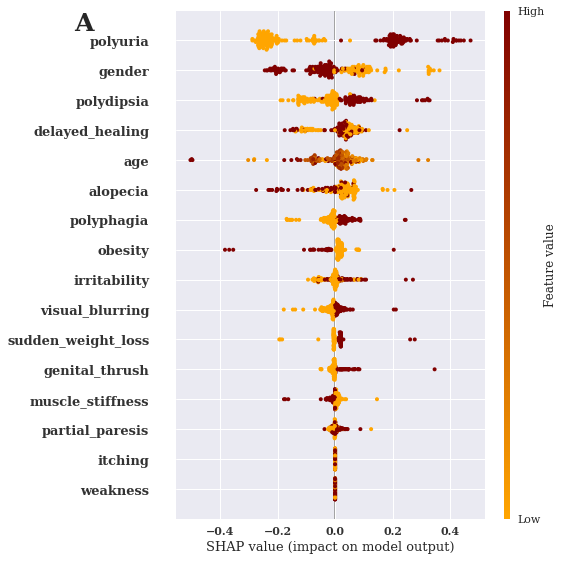

In [ ]:
plt.rcParams.update({'font.family':'serif'})
plt.title('A', weight='bold', fontsize=25, y = 0.95, x=-0.3)
plt.xticks(weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)
shap.summary_plot(dt_shap_values, show = False)

for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newCmap)

plt.tight_layout()
plt.savefig('SMOTE DT SHAP(A).png', dpi=800)
plt.savefig('SMOTE DT SHAP(A).pdf', dpi=800)

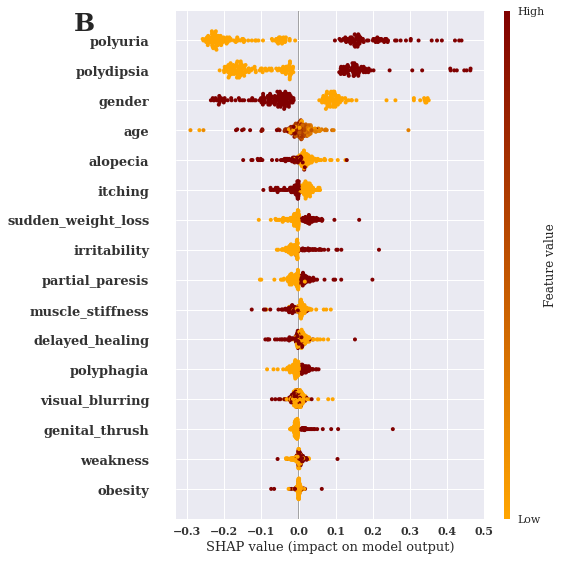

In [ ]:
plt.rcParams.update({'font.family':'serif'})
plt.title('B', weight='bold', fontsize=25, y = 0.95, x=-0.3)
plt.xticks(weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)
shap.summary_plot(rfc_shap_values, show = False)

for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newCmap)

plt.tight_layout()
plt.savefig('SMOTE RF SHAP(B).png', dpi=800)
plt.savefig('SMOTE RF SHAP(B).pdf', dpi=800)

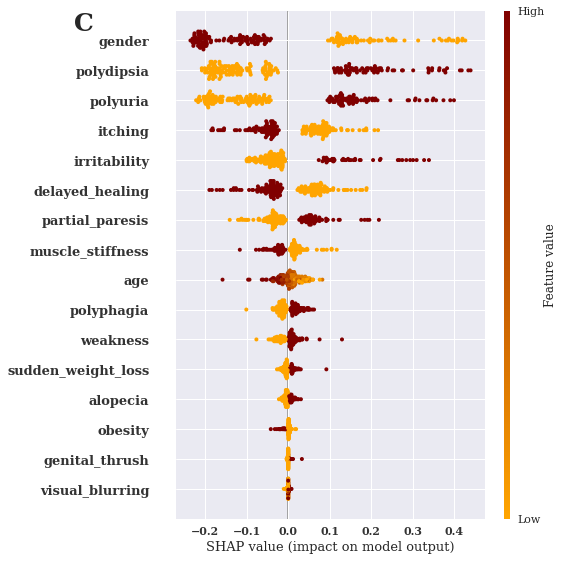

In [ ]:
plt.rcParams.update({'font.family':'serif'})
plt.title('C', weight='bold', fontsize=25, y = 0.95, x=-0.3)
plt.xticks(weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)
shap.summary_plot(svm_shap_values, show = False)

for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newCmap)

plt.tight_layout()
plt.savefig('SMOTE SVM SHAP(C).png', dpi=800)
plt.savefig('SMOTE SVM SHAP(C).pdf', dpi=800)

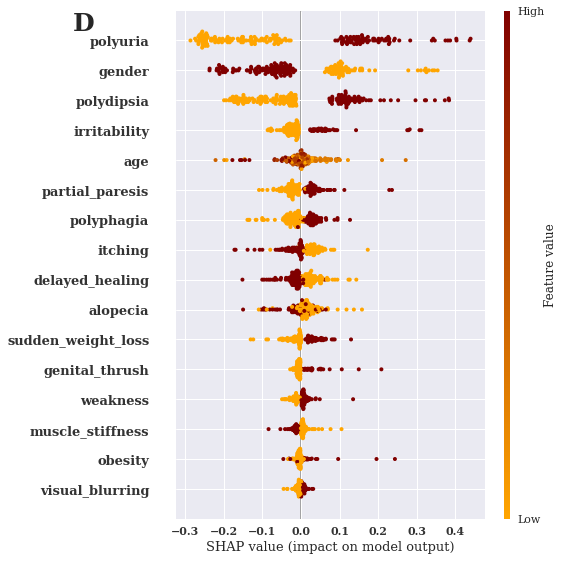

In [ ]:
plt.rcParams.update({'font.family':'serif'})
plt.title('D', weight='bold', fontsize=25, y = 0.95, x=-0.3)
plt.xticks(weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)
shap.summary_plot(xgb_shap_values, show = False)

for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newCmap)

plt.tight_layout()
plt.savefig('SMOTE XGB SHAP(D).png', dpi=800)
plt.savefig('SMOTE XGB SHAP(D).pdf', dpi=800)

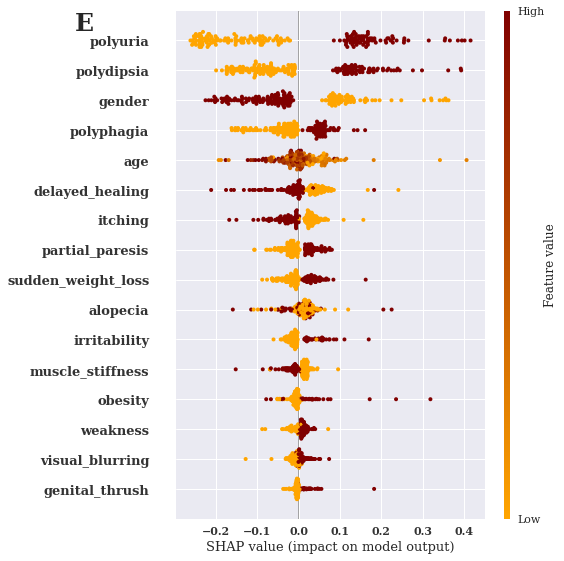

In [ ]:
plt.rcParams.update({'font.family':'serif'})
plt.title('E', weight='bold', fontsize=25, y = 0.95, x=-0.3)
plt.xticks(weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)
shap.summary_plot(lgb_shap_values, show = False)

for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newCmap)

plt.tight_layout()
plt.savefig('SMOTE LGB SHAP(E).png', dpi=800)
plt.savefig('SMOTE LGB SHAP(E).pdf', dpi=800)

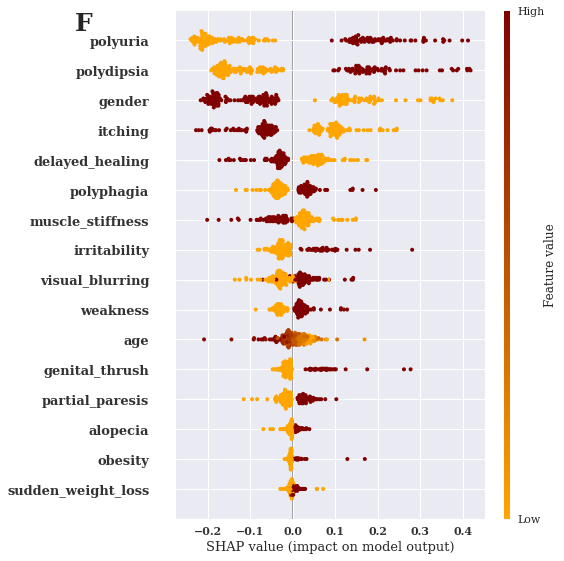

In [ ]:
plt.rcParams.update({'font.family':'serif'})
plt.title('F', weight='bold', fontsize=25, y = 0.95, x=-0.3)
plt.xticks(weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)
shap.summary_plot(mlp_shap_values, show = False)

for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newCmap)

plt.tight_layout()
plt.savefig('SMOTE MLP SHAP(F).png', dpi=800)
plt.savefig('SMOTE MLP SHAP(F).pdf', dpi=800)


**Using K-Flod Cross Validation**

Decision Tree

In [ ]:
pred = cross_val_predict(dt, xtest, ytest, cv=kf)
cm = confusion_matrix(ytest, pred)

In [ ]:
accuracy_score(ytest, pred), precision_score(ytest, pred), recall_score(ytest, pred)

(0.9114583333333334, 0.9270833333333334, 0.898989898989899)

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9247311827956989


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.898989898989899


In [ ]:
f1_score(ytest, pred), cohen_kappa_score(ytest, pred), matthews_corrcoef(ytest, pred)

(0.9128205128205129, 0.8229166666666666, 0.8233187759829511)

Random Forest

In [ ]:
pred = cross_val_predict(Rfc, xtest, ytest, cv=kf)
cm = confusion_matrix(ytest, pred)

In [ ]:
accuracy_score(ytest, pred), precision_score(ytest, pred), recall_score(ytest, pred)

(0.9375, 0.9578947368421052, 0.9191919191919192)

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.956989247311828


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9191919191919192


In [ ]:
f1_score(ytest, pred), cohen_kappa_score(ytest, pred), matthews_corrcoef(ytest, pred)

(0.9381443298969072, 0.8750406768630004, 0.8758007556895483)

SVM

In [ ]:
pred = cross_val_predict(svm_linear, xtest, ytest, cv=kf)
cm = confusion_matrix(ytest, pred)

In [ ]:
accuracy_score(ytest, pred), precision_score(ytest, pred), recall_score(ytest, pred)

(0.875, 0.8947368421052632, 0.8585858585858586)

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.8924731182795699


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.8585858585858586


In [ ]:
f1_score(ytest, pred), cohen_kappa_score(ytest, pred), matthews_corrcoef(ytest, pred)

(0.8762886597938143, 0.7500813537260007, 0.7507328902433652)

XGBoost

In [ ]:
pred = cross_val_predict(xgb, xtest, ytest, cv=kf)
cm = confusion_matrix(ytest, pred)

In [ ]:
accuracy_score(ytest, pred), precision_score(ytest, pred), recall_score(ytest, pred)

(0.9270833333333334, 0.9473684210526315, 0.9090909090909091)

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.946236559139785


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9090909090909091


In [ ]:
f1_score(ytest, pred), cohen_kappa_score(ytest, pred), matthews_corrcoef(ytest, pred)

(0.9278350515463918, 0.8542141230068337, 0.8549561114485178)

LightGBM

In [ ]:
pred = cross_val_predict(model, xtest, ytest, cv=kf)
cm = confusion_matrix(ytest, pred)

In [ ]:
accuracy_score(ytest, pred), precision_score(ytest, pred), recall_score(ytest, pred)

(0.9322916666666666, 0.9574468085106383, 0.9090909090909091)

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.956989247311828


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9090909090909091


In [ ]:
f1_score(ytest, pred), cohen_kappa_score(ytest, pred), matthews_corrcoef(ytest, pred)

(0.9326424870466321, 0.8646714378659727, 0.8658450832077323)

MLP

In [ ]:
pred = cross_val_predict(clf, xtest, ytest, cv=kf)
cm = confusion_matrix(ytest, pred)

Iteration 1, loss = 0.94409037
Iteration 2, loss = 0.71917849
Iteration 3, loss = 0.68358297
Iteration 4, loss = 0.75093654
Iteration 5, loss = 0.76494787
Iteration 6, loss = 0.72591105
Iteration 7, loss = 0.67785958
Iteration 8, loss = 0.65361436
Iteration 9, loss = 0.65931550
Iteration 10, loss = 0.67671362
Iteration 11, loss = 0.68484495
Iteration 12, loss = 0.67633232
Iteration 13, loss = 0.65662728
Iteration 14, loss = 0.63654198
Iteration 15, loss = 0.62505628
Iteration 16, loss = 0.62420661
Iteration 17, loss = 0.62853593
Iteration 18, loss = 0.63005183
Iteration 19, loss = 0.62431719
Iteration 20, loss = 0.61261583
Iteration 21, loss = 0.59987089
Iteration 22, loss = 0.59081562
Iteration 23, loss = 0.58690887
Iteration 24, loss = 0.58580831
Iteration 25, loss = 0.58356414
Iteration 26, loss = 0.57759522
Iteration 27, loss = 0.56819323
Iteration 28, loss = 0.55786654
Iteration 29, loss = 0.54931311
Iteration 30, loss = 0.54357757
Iteration 31, loss = 0.53910700
Iteration 32, los

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Iteration 49, loss = 0.37785102
Iteration 50, loss = 0.36881998
Iteration 51, loss = 0.36091636
Iteration 52, loss = 0.35133093
Iteration 53, loss = 0.34205574
Iteration 54, loss = 0.33429960
Iteration 55, loss = 0.32614326
Iteration 56, loss = 0.31723122
Iteration 57, loss = 0.30962476
Iteration 58, loss = 0.30248629
Iteration 59, loss = 0.29458405
Iteration 60, loss = 0.28767608
Iteration 61, loss = 0.28138706
Iteration 62, loss = 0.27444842
Iteration 63, loss = 0.26846068
Iteration 64, loss = 0.26288892
Iteration 65, loss = 0.25688241
Iteration 66, loss = 0.25198187
Iteration 67, loss = 0.24690589
Iteration 68, loss = 0.24209605
Iteration 69, loss = 0.23789742
Iteration 70, loss = 0.23340049
Iteration 71, loss = 0.22962942
Iteration 72, loss = 0.22578043
Iteration 73, loss = 0.22212292
Iteration 74, loss = 0.21888678
Iteration 75, loss = 0.21548077
Iteration 76, loss = 0.21261125
Iteration 77, loss = 0.20957922
Iteration 78, loss = 0.20690605
Iteration 79, loss = 0.20425589
Iteratio

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Iteration 93, loss = 0.19165009
Iteration 94, loss = 0.18998810
Iteration 95, loss = 0.18840666
Iteration 96, loss = 0.18682481
Iteration 97, loss = 0.18528322
Iteration 98, loss = 0.18377501
Iteration 99, loss = 0.18249273
Iteration 100, loss = 0.18114383
Iteration 101, loss = 0.17947959
Iteration 102, loss = 0.17791692
Iteration 103, loss = 0.17672019
Iteration 104, loss = 0.17531202
Iteration 105, loss = 0.17362090
Iteration 106, loss = 0.17220778
Iteration 107, loss = 0.17101206
Iteration 108, loss = 0.16958644
Iteration 109, loss = 0.16788620
Iteration 110, loss = 0.16618867
Iteration 111, loss = 0.16476833
Iteration 112, loss = 0.16350544
Iteration 113, loss = 0.16221372
Iteration 114, loss = 0.16067418
Iteration 115, loss = 0.15876787
Iteration 116, loss = 0.15707717
Iteration 117, loss = 0.15581279
Iteration 118, loss = 0.15482815
Iteration 119, loss = 0.15396495
Iteration 120, loss = 0.15238725
Iteration 121, loss = 0.15036718
Iteration 122, loss = 0.14882570
Iteration 123, lo

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Iteration 127, loss = 0.15024932
Iteration 128, loss = 0.14871952
Iteration 129, loss = 0.14749568
Iteration 130, loss = 0.14613637
Iteration 131, loss = 0.14449532
Iteration 132, loss = 0.14293830
Iteration 133, loss = 0.14185761
Iteration 134, loss = 0.14073363
Iteration 135, loss = 0.13922218
Iteration 136, loss = 0.13791457
Iteration 137, loss = 0.13697669
Iteration 138, loss = 0.13594043
Iteration 139, loss = 0.13469273
Iteration 140, loss = 0.13349257
Iteration 141, loss = 0.13256915
Iteration 142, loss = 0.13173417
Iteration 143, loss = 0.13075336
Iteration 144, loss = 0.12973466
Iteration 145, loss = 0.12887563
Iteration 146, loss = 0.12816758
Iteration 147, loss = 0.12746137
Iteration 148, loss = 0.12667754
Iteration 149, loss = 0.12590246
Iteration 150, loss = 0.12523273
Iteration 151, loss = 0.12467570
Iteration 152, loss = 0.12415912
Iteration 153, loss = 0.12361294
Iteration 154, loss = 0.12304187
Iteration 155, loss = 0.12248500
Iteration 156, loss = 0.12199332
Iteration 

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [ ]:
accuracy_score(ytest, pred), precision_score(ytest, pred), recall_score(ytest, pred)

(0.9114583333333334, 0.9270833333333334, 0.898989898989899)

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9247311827956989


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.898989898989899


In [ ]:
f1_score(ytest, pred), cohen_kappa_score(ytest, pred), matthews_corrcoef(ytest, pred)

(0.9128205128205129, 0.8229166666666666, 0.8233187759829511)

# **Performance Comapre using Bar Chart**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

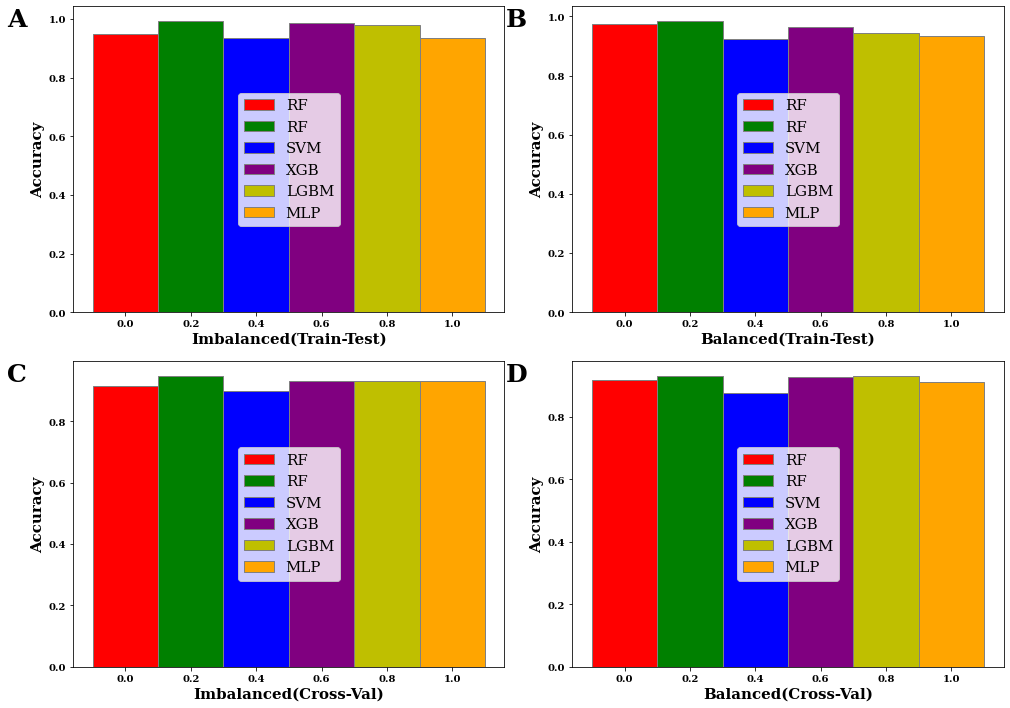

In [ ]:
plt.figure(figsize=(14,10))
plt.rcParams.update({'font.family':'serif'})
barWidth = 0.20

plt.subplot(2, 2, 1)
plt.title('A', weight='bold', fontsize=25, y = 0.915, x=-0.13)

DT = [0.9487]
RF = [0.9936]
SVM = [0.9359]
XGB = [0.9872]
LGBM = [0.9808]
MLP = [0.9359]

br1 = np.arange(len(DT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

plt.bar(br1, DT, color ='r', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br2, RF, color ='g', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br3, SVM, color ='b', width = barWidth,
        edgecolor ='grey', label ='SVM')
plt.bar(br4, XGB, color ='purple', width = barWidth,
        edgecolor ='grey', label ='XGB')
plt.bar(br5, LGBM, color ='y', width = barWidth,
        edgecolor ='grey', label ='LGBM')
plt.bar(br6, MLP, color ='orange', width = barWidth,
        edgecolor ='grey', label ='MLP')

plt.xlabel('Imbalanced(Train-Test)', fontweight ='bold', fontsize = 15)
plt.xticks(fontweight = 'bold')
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'center', fontsize=15)

plt.subplot(2, 2, 2)
plt.title('B', weight='bold', fontsize=25, y = 0.915, x=-0.13)

DT = [0.9739]
RF = [0.9844]
SVM = [0.9219]
XGB = [0.9635]
LGBM = [0.9427]
MLP = [0.9325]

br1 = np.arange(len(DT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

plt.bar(br1, DT, color ='r', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br2, RF, color ='g', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br3, SVM, color ='b', width = barWidth,
        edgecolor ='grey', label ='SVM')
plt.bar(br4, XGB, color ='purple', width = barWidth,
        edgecolor ='grey', label ='XGB')
plt.bar(br5, LGBM, color ='y', width = barWidth,
        edgecolor ='grey', label ='LGBM')
plt.bar(br6, MLP, color ='orange', width = barWidth,
        edgecolor ='grey', label ='MLP')

plt.xlabel('Balanced(Train-Test)', fontweight ='bold', fontsize = 15)
plt.xticks(fontweight = 'bold')
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'center', fontsize=15)

plt.subplot(2, 2, 3)
plt.title('C', weight='bold', fontsize=25, y = 0.915, x=-0.13)

DT = [0.9161]
RF = [0.9487]
SVM = [0.8974]
XGB = [0.9295]
LGBM = [0.9295]
MLP = [0.9295]

br1 = np.arange(len(DT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

plt.bar(br1, DT, color ='r', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br2, RF, color ='g', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br3, SVM, color ='b', width = barWidth,
        edgecolor ='grey', label ='SVM')
plt.bar(br4, XGB, color ='purple', width = barWidth,
        edgecolor ='grey', label ='XGB')
plt.bar(br5, LGBM, color ='y', width = barWidth,
        edgecolor ='grey', label ='LGBM')
plt.bar(br6, MLP, color ='orange', width = barWidth,
        edgecolor ='grey', label ='MLP')

plt.xlabel('Imbalanced(Cross-Val)', fontweight ='bold', fontsize = 15)
plt.xticks(fontweight = 'bold')
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'center', fontsize=15)

plt.subplot(2, 2, 4)
plt.title('D', weight='bold', fontsize=25, y = 0.915, x=-0.13)

DT = [0.9167]
RF = [0.9323]
SVM = [0.8750]
XGB = [0.9271]
LGBM = [0.9323]
MLP = [0.9114]

br1 = np.arange(len(DT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

plt.bar(br1, DT, color ='r', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br2, RF, color ='g', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br3, SVM, color ='b', width = barWidth,
        edgecolor ='grey', label ='SVM')
plt.bar(br4, XGB, color ='purple', width = barWidth,
        edgecolor ='grey', label ='XGB')
plt.bar(br5, LGBM, color ='y', width = barWidth,
        edgecolor ='grey', label ='LGBM')
plt.bar(br6, MLP, color ='orange', width = barWidth,
        edgecolor ='grey', label ='MLP')

plt.xlabel('Balanced(Cross-Val)', fontweight ='bold', fontsize = 15)
plt.xticks(fontweight = 'bold')
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'center', fontsize=15)

plt.tight_layout()
plt.savefig('Compare Performance Based On Dataset.png', dpi=800)
plt.savefig('Compare Performance Based On Dataset.pdf', dpi=800)

<ipython-input-9-b08e17a6ebe1>:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


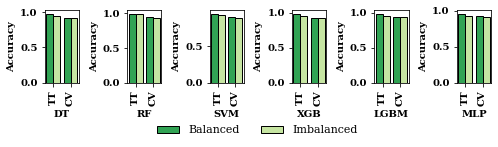

In [ ]:
plt.figure(figsize=(8,2))

ax = plt.GridSpec(2, 6)
ax.update(wspace=1.4, hspace=-0.5)

plt.rcParams.update({'font.family':'serif'})
barWidth = 0.4

ax1 = plt.subplot(ax[0,0])

TT = [0.9739, 0.9161]
CV= [0.9487, 0.9167]


br1 = np.arange(len(TT))
br2 = [x + barWidth for x in br1]

plt.bar(br1, TT,  width = barWidth, edgecolor ='black', color ='#31a354', label ='Imbalanced')
plt.bar(br2, CV,  width = barWidth, edgecolor ='black', color ='#c6e5a2', label ='Balanced')

plt.xlabel('DT', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth/2 for r in range(len(TT))], ['TT', 'CV'], rotation=90, fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 10)
plt.yticks(fontweight = 'bold', fontsize = 10)
# plt.legend(loc = 'lower center', fontsize=11)

ax2 = plt.subplot(ax[0,1])

TT = [0.9936, 0.9487]
CV= [0.9844, 0.9323]

br1 = np.arange(len(TT))
br2 = [x + barWidth for x in br1]

plt.bar(br1, TT,  width = barWidth, edgecolor ='black', color ='#31a354', label ='Imbalanced')
plt.bar(br2, CV,  width = barWidth, edgecolor ='black', color ='#c6e5a2', label ='Balanced')

plt.xlabel('RF', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth/2 for r in range(len(TT))], ['TT', 'CV'], rotation=90, fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 10)
plt.yticks(fontweight = 'bold', fontsize = 10)
# plt.legend(loc = 'lower center', fontsize=11)


ax3 = plt.subplot(ax[0,2])

TT = [0.9359, 0.8974]
CV= [0.9219, 0.8750]

br1 = np.arange(len(TT))
br2 = [x + barWidth for x in br1]

plt.bar(br1, TT, width = barWidth, edgecolor ='black', color ='#31a354',  label ='Imbalanced')
plt.bar(br2, CV, width = barWidth,  edgecolor ='black', color ='#c6e5a2', label ='Balanced')

plt.xlabel('SVM', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth/2 for r in range(len(TT))], ['TT', 'CV'], rotation=90, fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 10)
plt.yticks(fontweight = 'bold', fontsize = 10)
# plt.legend(loc = 'lower center', fontsize=11)






ax4 = plt.subplot(ax[0,4])

TT = [0.9808, 0.9295]
CV= [0.9472, 0.9323]

br1 = np.arange(len(TT))
br2 = [x + barWidth for x in br1]

plt.bar(br1, TT, width = barWidth, edgecolor ='black', color ='#31a354',  label ='Imbalanced')
plt.bar(br2, CV, width = barWidth,  edgecolor ='black', color ='#c6e5a2', label ='Balanced')

plt.xlabel('LGBM', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth/2 for r in range(len(TT))], ['TT', 'CV'], rotation=90, fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 10)
plt.yticks(fontweight = 'bold', fontsize = 10)
# plt.legend(loc = 'lower center', fontsize=11)



ax5 = plt.subplot(ax[0,5])

TT = [0.9559, 0.9295]
CV= [0.9323, 0.9114]

br1 = np.arange(len(TT))
br2 = [x + barWidth for x in br1]

plt.bar(br1, TT, width = barWidth, edgecolor ='black', color ='#31a354',  label ='Imbalanced')
plt.bar(br2, CV, width = barWidth,  edgecolor ='black', color ='#c6e5a2', label ='Balanced')

plt.xlabel('MLP', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth/2 for r in range(len(TT))], ['TT', 'CV'], rotation=90, fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 10)
plt.yticks(fontweight = 'bold')
# plt.legend(loc = 'lower center', fontsize=11)


ax6 = plt.subplot(ax[0,3])
TT = [0.9872, 0.9295]
CV= [0.9635, 0.9271]

br1 = np.arange(len(TT))
br2 = [x + barWidth for x in br1]


plt.bar(br1, TT, width = barWidth, edgecolor ='black', color ='#31a354',  label ='Balanced')
plt.bar(br2, CV, width = barWidth,  edgecolor ='black', color ='#c6e5a2', label ='Imbalanced')

plt.xlabel('XGB', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth/2 for r in range(len(TT))], ['TT', 'CV'], rotation=90, fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 10)
plt.yticks(fontweight = 'bold', fontsize = 10)
plt.legend(ncol=2,bbox_to_anchor=(2.2,-0.45), fontsize=11, frameon=False)

plt.tight_layout()
plt.savefig('Compare Performance Based On Classifires.png', dpi=800)
plt.savefig('Compare Performance Based On Classifires.pdf', dpi=800)

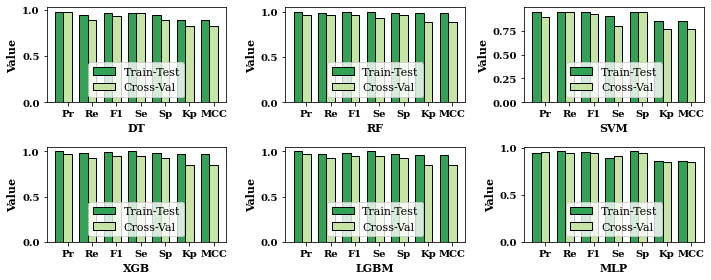

In [ ]:
plt.figure(figsize=(10,4))
plt.rcParams.update({'font.family':'serif'})
barWidth = 0.35

plt.subplot(2, 3, 1)

IM_TT = [0.9796, 0.9412, 0.9600, 0.9629, 0.9412, 0.8886, 0.8900]
IM_CV= [0.9784, 0.8921, 0.9333, 0.9629, 0.8921, 0.8228, 0.8291]

br1 = np.arange(len(IM_TT))
br2 = [x + barWidth for x in br1]

plt.bar(br1, IM_TT, width = barWidth, edgecolor ='black', color ='#31a354', label ='Train-Test')
plt.bar(br2, IM_CV, width = barWidth, edgecolor ='black', color ='#c6e5a2', label ='Cross-Val')

plt.xlabel('DT', fontweight ='bold', fontsize = 11)
plt.xticks([r + barWidth for r in range(len(IM_TT))], ['Pr', 'Re', 'F1', 'Se', 'Sp', 'Kp', 'MCC'], fontweight ='bold')
plt.ylabel('Value', fontweight ='bold', fontsize = 11)
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'lower center', fontsize=11)

plt.subplot(2, 3, 2)


IM_TT = [1.00, 0.9902, 0.9951, 1.0000, 0.9902, 0.9859, 0.9860]
IM_CV= [0.9608, 0.9608, 0.9608, 0.9259, 0.9608, 0.8867, 0.8867]

br1 = np.arange(len(IM_TT))
br2 = [x + barWidth for x in br1]

plt.bar(br1, IM_TT, width = barWidth, edgecolor ='black', color ='#31a354', label ='Train-Test')
plt.bar(br2, IM_CV, width = barWidth, edgecolor ='black', color ='#c6e5a2', label ='Cross-Val')

plt.xlabel('RF', fontweight ='bold', fontsize = 11)
plt.xticks([r + barWidth for r in range(len(IM_TT))], ['Pr', 'Re', 'F1', 'Se', 'Sp', 'Kp', 'MCC'], fontweight ='bold')
plt.ylabel('Value', fontweight ='bold', fontsize = 11)
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'lower center', fontsize=11)

plt.subplot(2, 3, 3)


IM_TT = [0.9510, 0.9510, 0.9510, 0.9074, 0.9510, 0.8584, 0.8584]
IM_CV= [0.8981, 0.9509, 0.9238, 0.7963, 0.9509, 0.7673, 0.7703]

br1 = np.arange(len(IM_TT))
br2 = [x + barWidth for x in br1]

plt.bar(br1, IM_TT, width = barWidth, edgecolor ='black', color ='#31a354', label ='Train-Test')
plt.bar(br2, IM_CV, width = barWidth, edgecolor ='black', color ='#c6e5a2', label ='Cross-Val')

plt.xlabel('SVM', fontweight ='bold', fontsize = 11)
plt.xticks([r + barWidth for r in range(len(IM_TT))], ['Pr', 'Re', 'F1', 'Se', 'Sp', 'Kp', 'MCC'], fontweight ='bold')
plt.ylabel('Value', fontweight ='bold', fontsize = 11)
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'lower center', fontsize=11)

plt.subplot(2, 3, 4)


IM_TT = [1.0000, 0.9804, 0.9901, 1.0000, 0.9804, 0.9719, 0.9723]
IM_CV= [0.9691, 0.9216, 0.9447, 0.9444, 0.9216, 0.8475, 0.8496]

br1 = np.arange(len(IM_TT))
br2 = [x + barWidth for x in br1]

plt.bar(br1, IM_TT, width = barWidth, edgecolor ='black', color ='#31a354', label ='Train-Test')
plt.bar(br2, IM_CV, width = barWidth, edgecolor ='black', color ='#c6e5a2', label ='Cross-Val')

plt.xlabel('XGB', fontweight ='bold', fontsize = 11)
plt.xticks([r + barWidth for r in range(len(IM_TT))], ['Pr', 'Re', 'F1', 'Se', 'Sp', 'Kp', 'MCC'], fontweight ='bold')
plt.ylabel('Value', fontweight ='bold', fontsize = 11)
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'lower center', fontsize=11)


plt.subplot(2, 3, 5)


IM_TT = [1.0000, 0.9706, 0.9851, 1.0000, 0.9706, 0.9580, 0.9589]
IM_CV= [0.9691, 0.9216, 0.9447, 0.9444, 0.9216, 0.8475, 0.8496]

br1 = np.arange(len(IM_TT))
br2 = [x + barWidth for x in br1]

plt.bar(br1, IM_TT, width = barWidth, edgecolor ='black', color ='#31a354', label ='Train-Test')
plt.bar(br2, IM_CV, width = barWidth, edgecolor ='black', color ='#c6e5a2', label ='Cross-Val')

plt.xlabel('LGBM', fontweight ='bold', fontsize = 11)
plt.xticks([r + barWidth for r in range(len(IM_TT))], ['Pr', 'Re', 'F1', 'Se', 'Sp', 'Kp', 'MCC'], fontweight ='bold')
plt.ylabel('Value', fontweight ='bold', fontsize = 11)
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'lower center', fontsize=11)


plt.subplot(2, 3, 6)


IM_TT = [0.9423, 0.9608, 0.9514, 0.8889, 0.9608, 0.8571, 0.8575]
IM_CV= [0.9505, 0.9412, 0.9458, 0.9074, 0.9412, 0.8449, 0.8450]

br1 = np.arange(len(IM_TT))
br2 = [x + barWidth for x in br1]

plt.bar(br1, IM_TT, width = barWidth, edgecolor ='black', color ='#31a354', label ='Train-Test')
plt.bar(br2, IM_CV, width = barWidth, edgecolor ='black', color ='#c6e5a2', label ='Cross-Val')

plt.xlabel('MLP', fontweight ='bold', fontsize = 11)
plt.xticks([r + barWidth for r in range(len(IM_TT))], ['Pr', 'Re', 'F1', 'Se', 'Sp', 'Kp', 'MCC'], fontweight ='bold')
plt.ylabel('Value', fontweight ='bold', fontsize = 11)
plt.yticks(fontweight = 'bold')
plt.legend(loc = 'lower center', fontsize=11)


plt.tight_layout()
plt.savefig('Compare Performance Based On Classifires For balanced Dataset All Metrics.png', dpi=800)
plt.savefig('Compare Performance Based On Classifires For balanced Dataset All Metrics.pdf', dpi=800)